In [0]:
!pip install -q tensorflow-gpu==2.0.0

ERROR: Operation cancelled by user


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import  Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model



In [0]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-02-20 01:32:03--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3035::681f:5130, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.02s   

2020-02-20 01:32:03 (28.6 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [0]:
df_train, df_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size = 0.33)

In [0]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [0]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Se han encontrado %s tokens unicos' % V)

Se han encontrado 7222 tokens unicos


In [0]:
data_train = pad_sequences(sequences_train)
print('Tamaño de el tensor de datos de entrenamiento:', data_train.shape)

Tamaño de el tensor de datos de entrenamiento: (3733, 189)


In [0]:
T = data_train.shape[1]
print(T)
data_test = pad_sequences(sequences_test, maxlen = T)
print('Tamaño de el tensor de datos de prueba:', data_test.shape)

189
Tamaño de el tensor de datos de prueba: (1839, 189)


In [0]:
D = 20

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [0]:
model.compile(
    loss= 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

print('A entrenar!!...')

r = model.fit(
    data_train,
    Y_train,
    epochs = 30,
    validation_data = (data_test, Y_test)
)

A entrenar!!...
Train on 3733 samples, validate on 1839 samples
Epoch 1/30
3733/3733 [==============================] - 9s 2ms/sample - loss: 0.3825 - accuracy: 0.8634 - val_loss: 0.2647 - val_accuracy: 0.8684
Epoch 2/30
3733/3733 [==============================] - 1s 264us/sample - loss: 0.1086 - accuracy: 0.9628 - val_loss: 0.1578 - val_accuracy: 0.9652
Epoch 3/30
3733/3733 [==============================] - 1s 271us/sample - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0719 - val_accuracy: 0.9826
Epoch 4/30
3733/3733 [==============================] - 1s 277us/sample - loss: 0.0042 - accuracy: 0.9997 - val_loss: 0.0924 - val_accuracy: 0.9815
Epoch 5/30
3733/3733 [==============================] - 1s 288us/sample - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0829 - val_accuracy: 0.9831
Epoch 6/30
3733/3733 [==============================] - 1s 295us/sample - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0922 - val_accuracy: 0.9826
Epoch 7/30
3733/3733 [============================

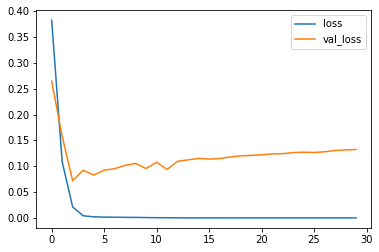

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

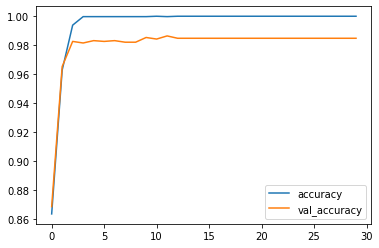

In [0]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()